[0.0625 0.25   0.375  0.25   0.0625]


C:\Users\abdal\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\abdal\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


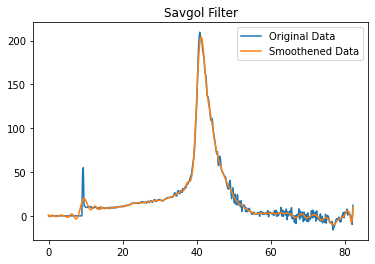

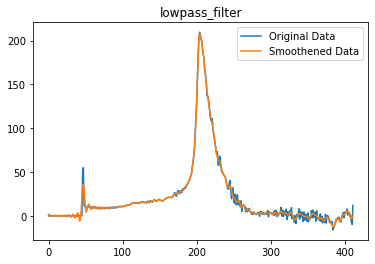

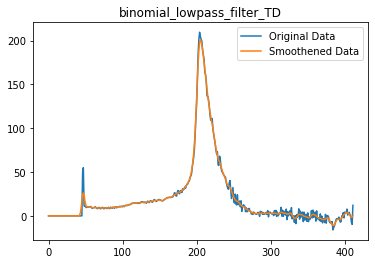

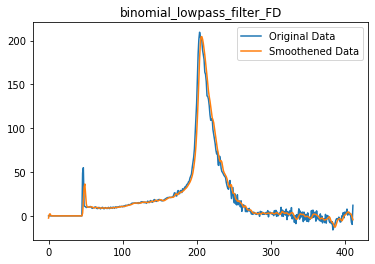

In [64]:
import numpy as np
import pandas as pd 
import xlsxwriter as xlsw
from scipy.signal import savgol_filter
from matplotlib import pyplot as plt

#This code reads data from an excel sheet und computes the derivative with respect to time. It then uses different approaches 
#to smoothen the resulting curve. 


read_file = pd.read_excel('Mappe1.xlsx')
csv_file = read_file.to_csv()
df1= pd.read_excel('Mappe1.xlsx', usecols="A")
df = pd.read_excel('Mappe1.xlsx', usecols="B")

time = np.array(df1)[::10,0]
data = np.array(df)[::10,0]
derivative= np.gradient(data,time)

#use the function savgol_filter from the library scipy to smoothen the curve
smoothed_data= savgol_filter(derivative, 51,10)
plt.plot(time,derivative)
plt.plot(time,smoothed_data)
plt.legend(['Original Data', 'Smoothened Data'])
plt.title('Savgol Filter')
d={'Time': time, 'Original Data': data, 'Derivative': derivative}
df = pd.DataFrame(d)
df.to_excel("output.xlsx")  

# transform the signal into the Fourier-domain and set the coefficients corresponding to
#high frequencies to zero.
def lowpass_filter(signal,k):
    result = np.fft.fft(signal)
    n= result.size
    w_mid= int(n/2)
    result[w_mid-int(k):w_mid+int(k)]=0
    filtered_signal=np.fft.ifft(result)
    return filtered_signal

#computes the binomial coefficients using a recursive approach
def binomial_coefficient(n,p):
    if p==0 or p==n:
        return 1
    else:
        return binomial_coefficient(n-1,p)+binomial_coefficient(n-1,p-1)

#generate an array consisting of a binomial kernel which is used afterwards as a low-pass filter
def binomial_kernel(n):
    result=[]
    for i in range(0,n+1):
        result.append(binomial_coefficient(n,i))
    return result/np.power(2,n)

#omit high frequencies in the Fourier-domain by multiplying the Fourier-transform of the signal
#with the fourier-transform of a binomial kernel
def binomial_lowpass_filter_FD(signal,n):
    h=np.zeros(signal.size)
    h[0:n+1]=binomial_kernel(n)
    H=np.fft.fft(h)
    Signal=np.fft.fft(signal)
    product=H*Signal
    return np.fft.ifft(product)

# represent the time-domain counterpart of the previous function
def binomial_lowpass_filter_TD(signal,n):
    return np.convolve(signal, binomial_kernel(n),'same')

def plot(approach,n,signal):
    f=plt.figure()
    ax=f.add_subplot()
    processed_signal= approach(signal,n)
    ax.plot(signal)
    ax.plot(processed_signal)
    ax.legend(['Original Data', 'Smoothened Data'])
    title = approach.__name__
    ax.set_title(title)


def test():
    print(binomial_kernel(4))
    plot(lowpass_filter, int(derivative.size/3), derivative)
    plot(binomial_lowpass_filter_TD,12,derivative)
    plot(binomial_lowpass_filter_FD,4,derivative)

test()







